In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [14]:
df=pd.read_excel('/Automobile.xlsx')
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [16]:
df.shape

(398, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [18]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [19]:
dups=df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin


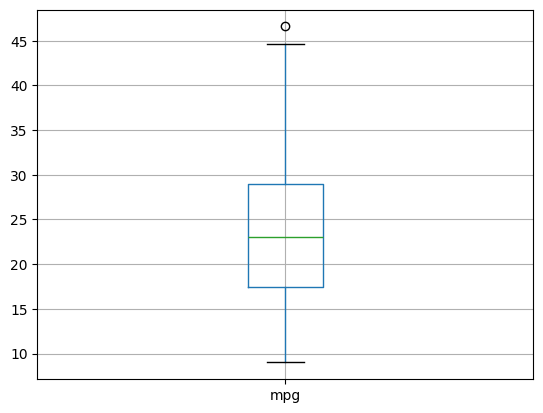

In [21]:
df.boxplot(column=['mpg'])
plt.show()

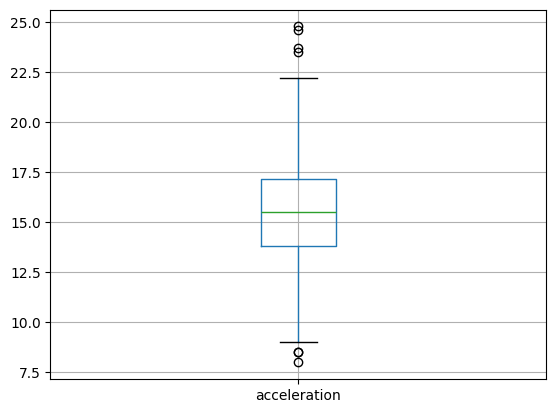

In [25]:
df.boxplot(column=['acceleration'])
plt.show()

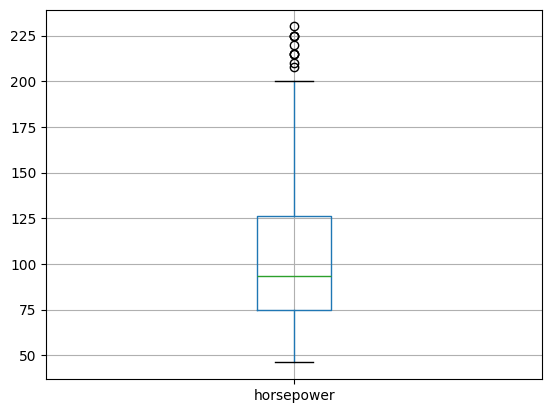

In [28]:
df.boxplot(column=['horsepower'])
plt.show()

In [29]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [30]:
lrmpg,urmpg=remove_outlier(df['mpg'])
df['mpg']=np.where(df['mpg']>urmpg,urmpg,df['mpg'])
df['mpg']=np.where(df['mpg']<lrmpg,lrmpg,df['mpg'])

lracceleration,uracceleration=remove_outlier(df['acceleration'])
df['acceleration']=np.where(df['acceleration']>uracceleration,uracceleration,df['acceleration'])
df['acceleration']=np.where(df['acceleration']<lracceleration,lracceleration,df['acceleration'])

lrhorsepower,urhorsepower=remove_outlier(df['horsepower'])
df['horsepower']=np.where(df['horsepower']>urhorsepower,urhorsepower,df['horsepower'])
df['horsepower']=np.where(df['horsepower']<lrhorsepower,lrhorsepower,df['horsepower'])

df.shape

(398, 9)

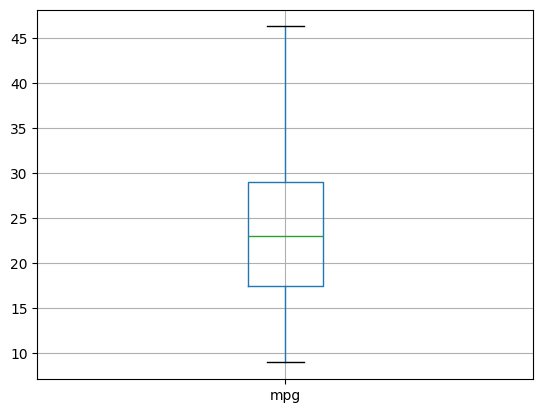

In [31]:
df.boxplot(column=['mpg'])
plt.show()

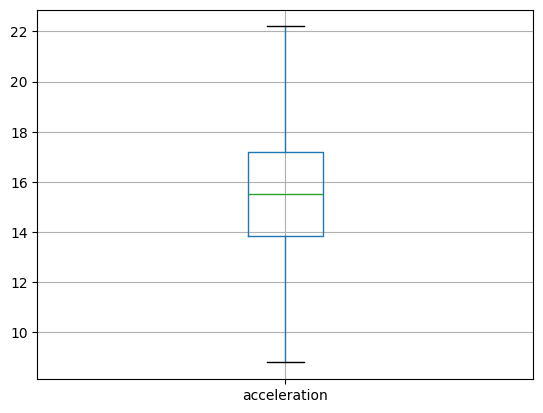

In [32]:
df.boxplot(column=['acceleration'])
plt.show()

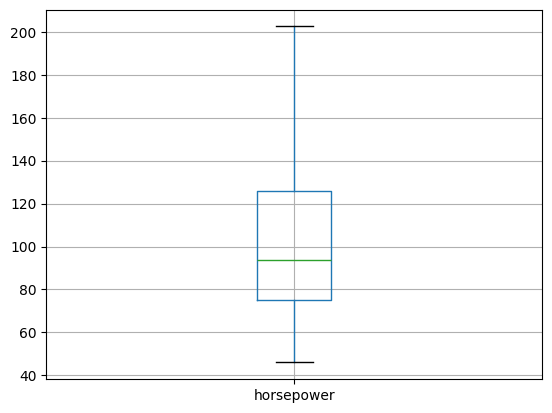

In [33]:
df.boxplot(column=['horsepower'])
plt.show()

In [34]:
#no missing values
df.isnull().sum()

,0
name,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0


/tmp/ipython-input-959468068.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.mpg,bins=20)


<Axes: xlabel='mpg', ylabel='Density'>

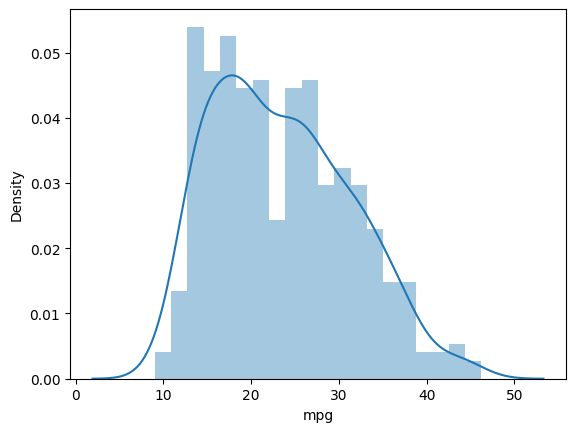

In [41]:
sns.distplot(df.mpg,bins=20)

<Axes: xlabel='cylinders', ylabel='count'>

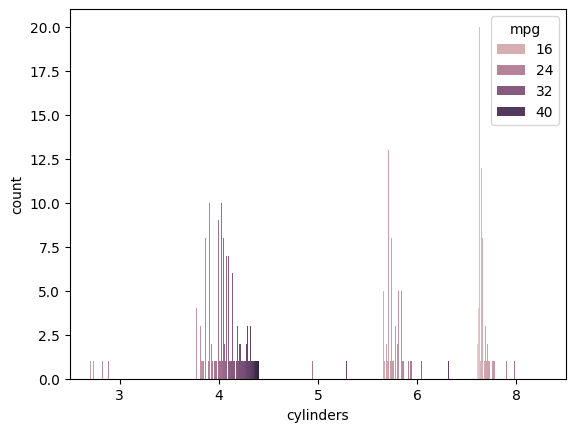

In [51]:
sns.countplot(x="cylinders",hue="mpg",data=df)

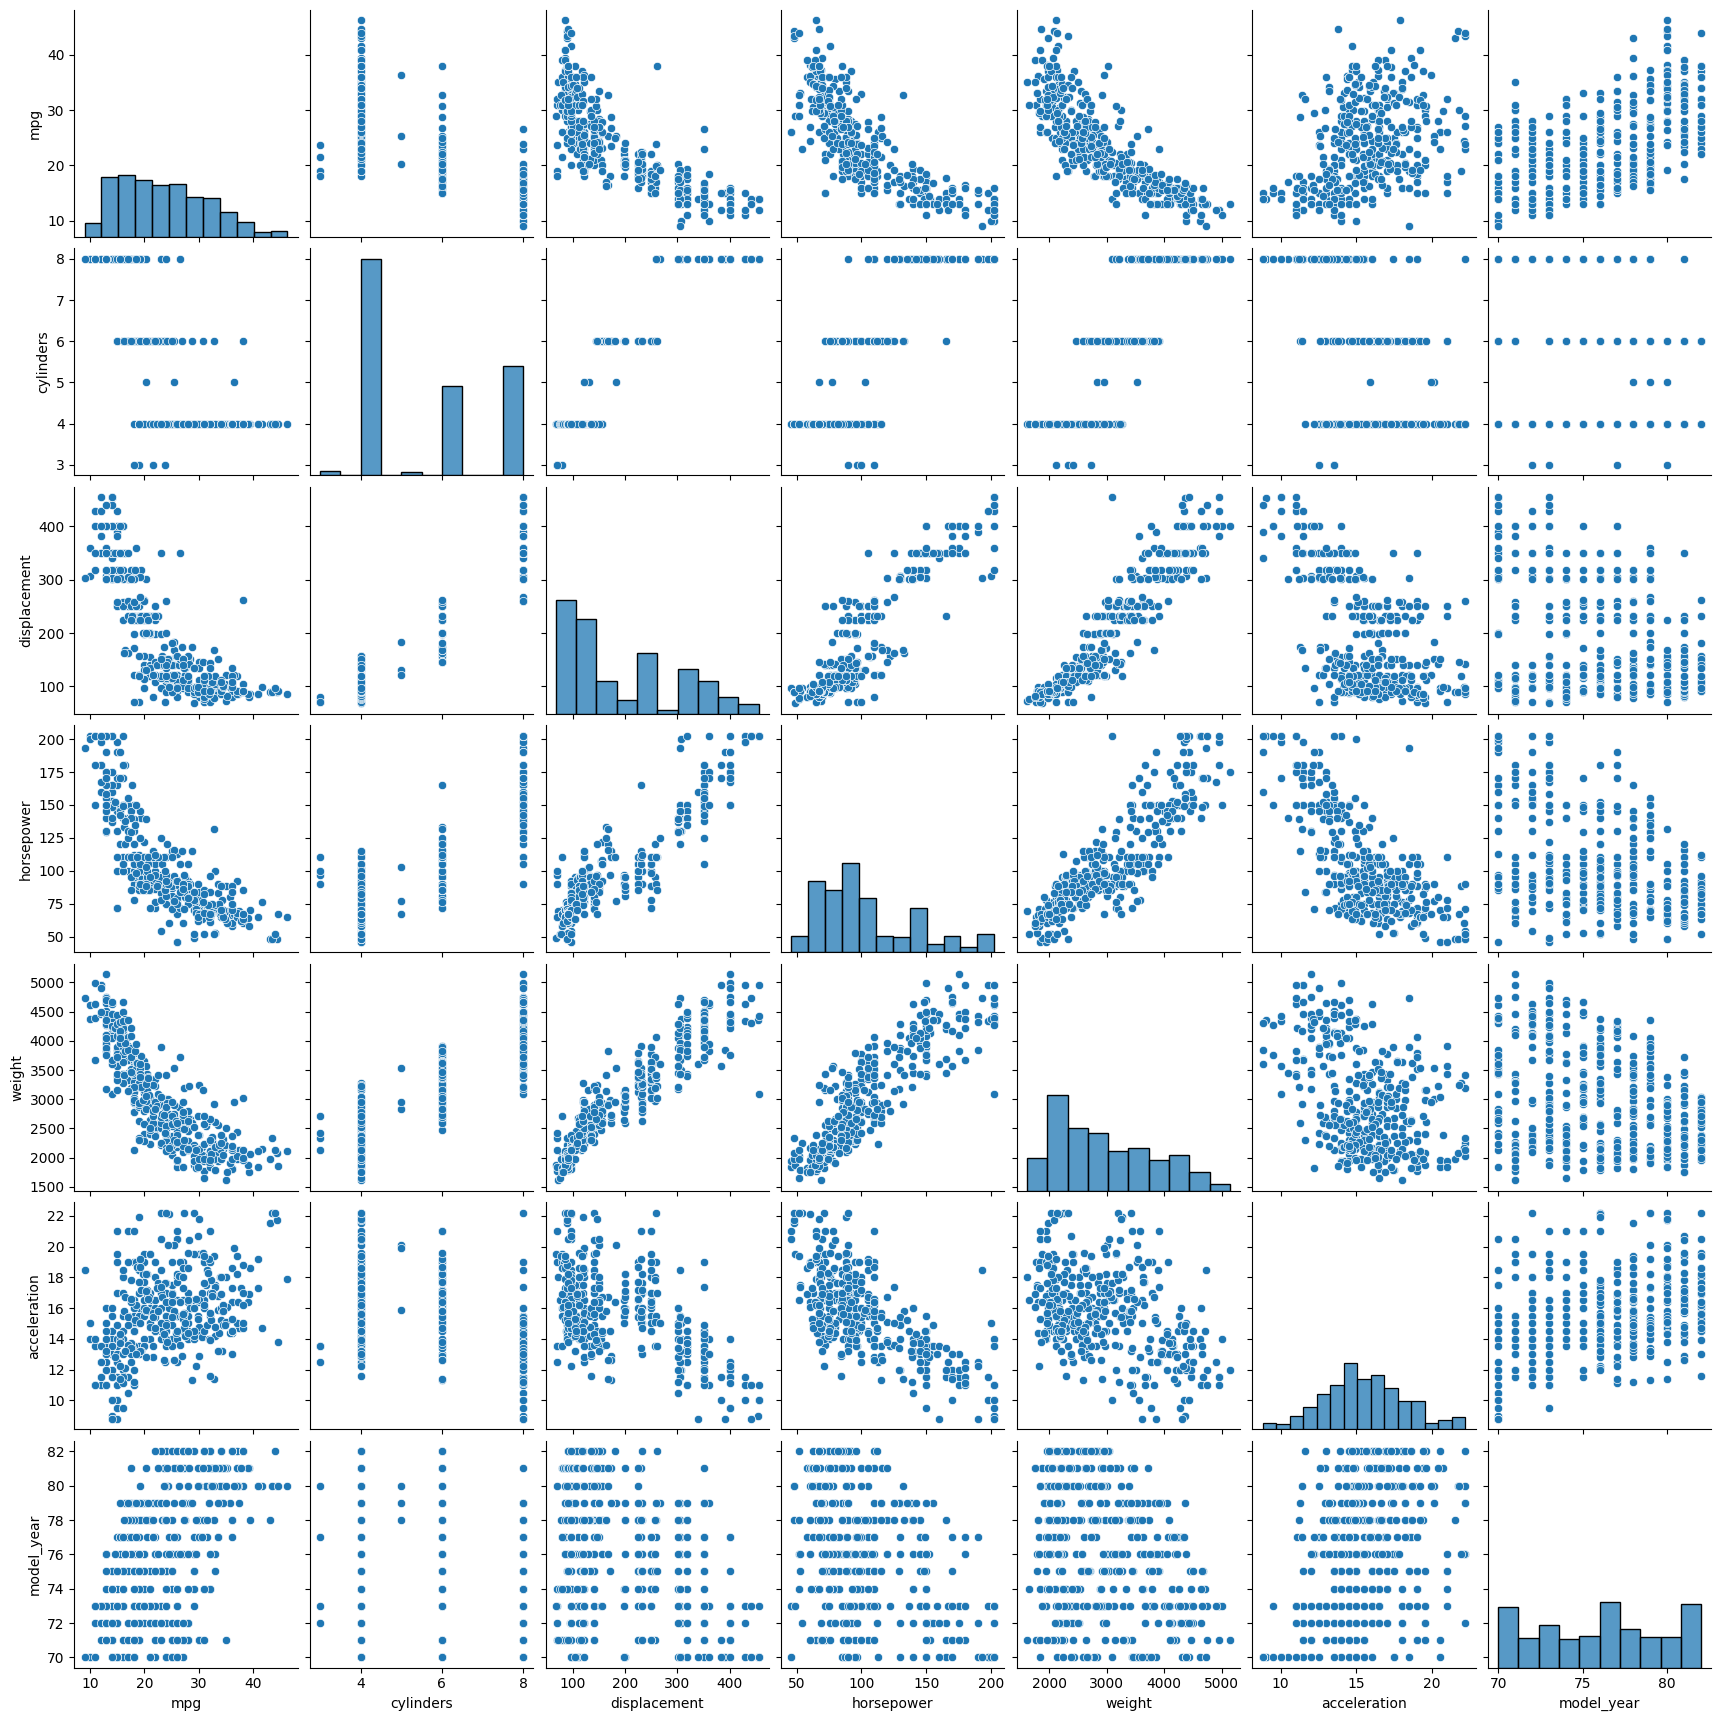

In [45]:
sns.pairplot(df)
plt.show()

In [54]:
df_numeric = df.drop(['name', 'origin'], axis=1)
df_numeric.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775556,-0.804353,-0.789003,-0.831901,0.418333,0.579337
cylinders,-0.775556,1.000000,0.950721,0.853232,0.896017,-0.509344,-0.348746
displacement,-0.804353,0.950721,1.000000,0.900759,0.932824,-0.548667,-0.370164
horsepower,-0.789003,0.853232,0.900759,1.000000,0.874438,-0.695466,-0.415158
weight,-0.831901,0.896017,0.932824,0.874438,1.000000,-0.422492,-0.306564
acceleration,0.418333,-0.509344,-0.548667,-0.695466,-0.422492,1.000000,0.287122
model_year,0.579337,-0.348746,-0.370164,-0.415158,-0.306564,0.287122,1.000000


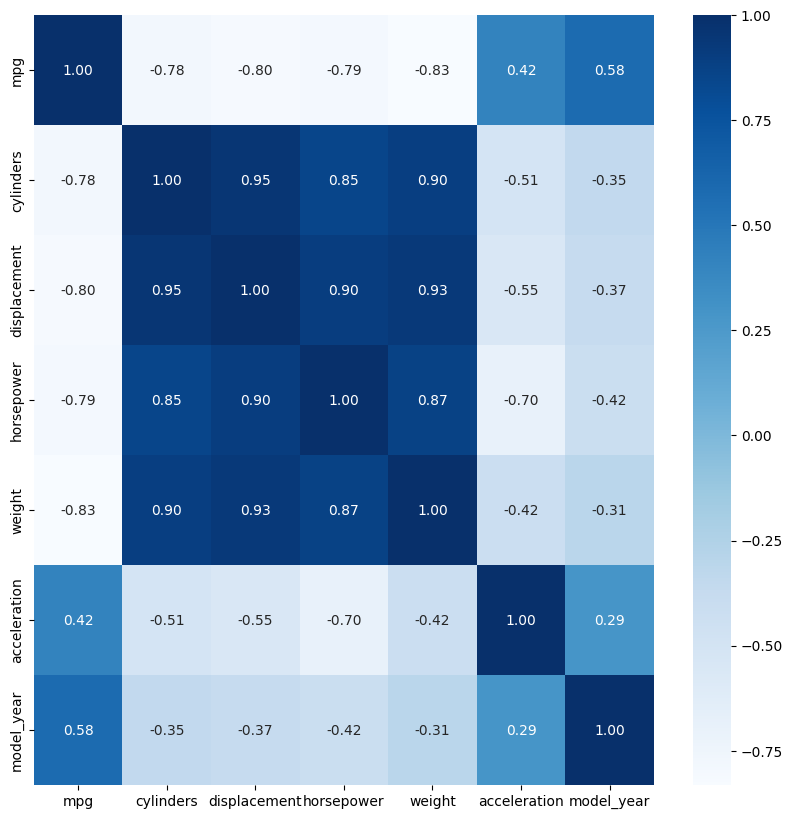

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(df_numeric.corr(),annot=True,fmt='.2f',cmap='Blues')
plt.show()

In [58]:
dummies=pd.get_dummies(df[["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year"]],columns=["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year"],prefix=["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year"],drop_first=True).head()

In [60]:
columns=["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year"]
df = pd.concat([df,dummies],axis=1)
df.drop(columns,axis=1,inplace=True)

In [61]:
df.head()

,name,origin,mpg_10.0,mpg_11.0,mpg_12.0,mpg_13.0,mpg_14.0,mpg_14.5,mpg_15.0,mpg_15.5,...,model_year_73,model_year_74,model_year_75,model_year_76,model_year_77,model_year_78,model_year_79,model_year_80,model_year_81,model_year_82
0,chevrolet chevelle malibu,usa,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,buick skylark 320,usa,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,plymouth satellite,usa,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,amc rebel sst,usa,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,ford torino,usa,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
